In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

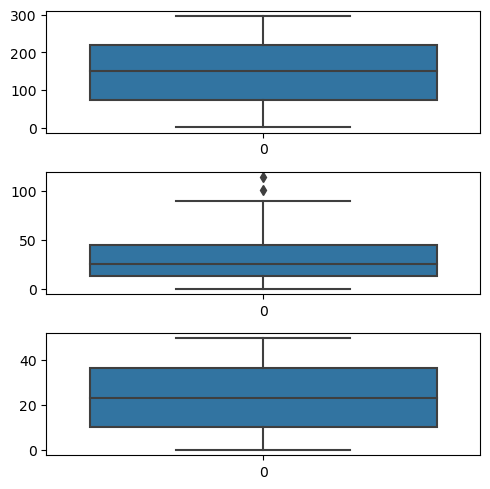

In [8]:
fig, axs=plt.subplots(3, figsize=(5,5))
plt1= sns.boxplot(df['TV'], ax=axs[0])
plt2= sns.boxplot(df['newspaper'], ax=axs[1])
plt3= sns.boxplot(df['radio'], ax=axs[2])
plt.tight_layout()


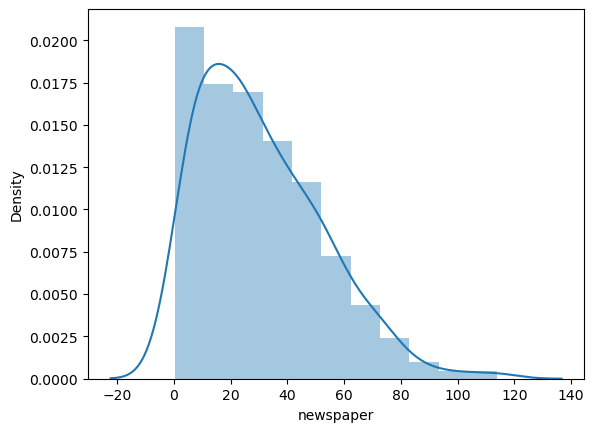

In [9]:
sns.distplot(df["newspaper"])

In [10]:
iqr=df.newspaper.quantile(0.75)-df.newspaper.quantile(0.25)

In [11]:
lower_bridge=df['newspaper'].quantile(0.25)-(iqr*1.5)
upper_bridge=df['newspaper'].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [12]:
data=df.copy()

In [13]:
data.loc[data['newspaper']>=93, 'newspaper']=93

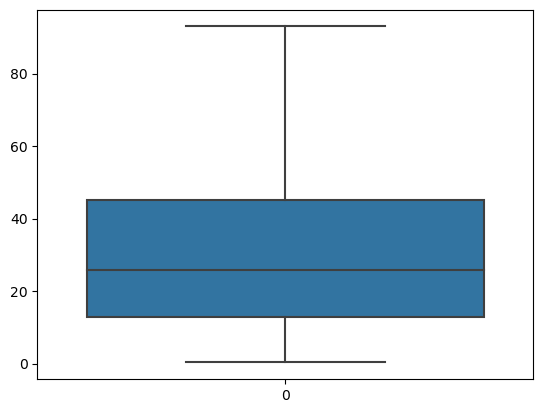

In [14]:
sns.boxplot(data["newspaper"])

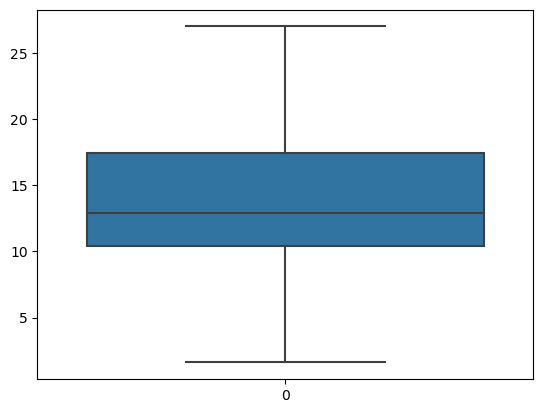

In [15]:
sns.boxplot(data['sales']);

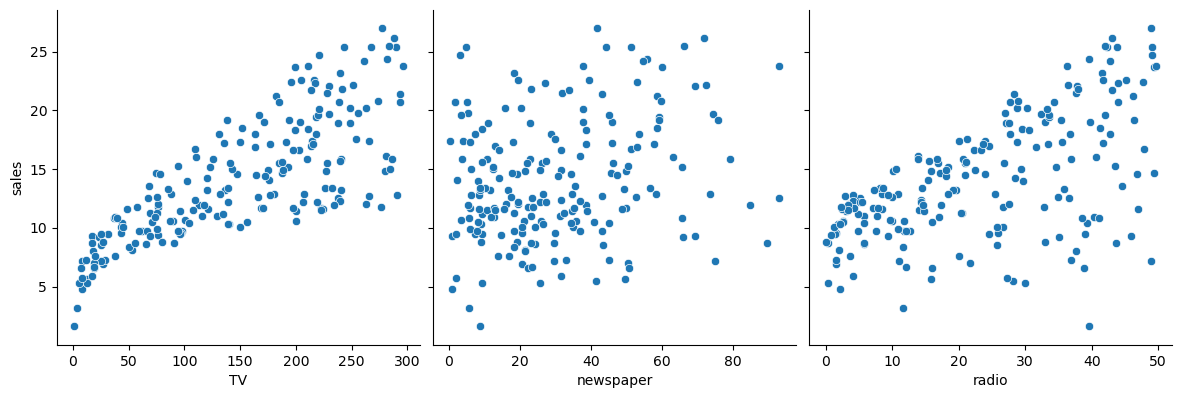

In [16]:
sns.pairplot(data, x_vars=['TV', 'newspaper', 'radio'],
             y_vars='sales', height=4, aspect=1, kind='scatter')
plt.show()

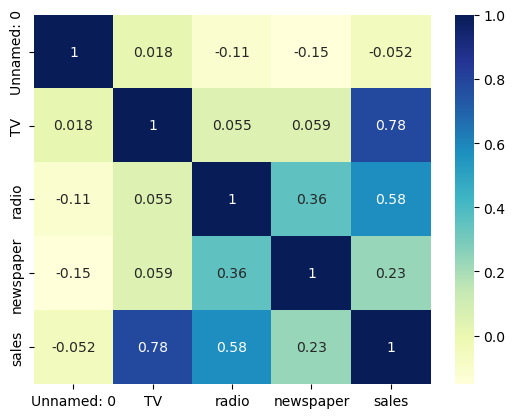

In [17]:
sns.heatmap(data.corr(), cmap='YlGnBu',annot=True)
plt.show()

In [18]:
important_features=list(df.corr()['sales'][(df.corr()['sales']>+0.5)|(df.corr()['sales']<-0.5)].index)

In [19]:
print(important_features)

['TV', 'radio', 'sales']


In [20]:
x=data['TV']
y=data['sales']

In [21]:
x

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [22]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [23]:
print(x.shape,y.shape)

(200,) (200,)


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.33)

In [25]:
print(x_train.shape,y_train.shape)

(134,) (134,)


In [26]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [42]:
x_train_reshaped = np.reshape(x_train.values, (-1, 1))
x_test_reshaped = x_test.values.reshape(-1, 1)

In [37]:
knn=KNeighborsRegressor().fit(x_train_reshaped, y_train)
knn

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [40]:
knn_train_pred=knn.predict(x_train_reshaped)

In [44]:
knn_test_pred=knn.predict(x_test_reshaped)

In [45]:
print(knn_train_pred, knn_test_pred)

[14.06 15.02  6.1  10.44 16.28 12.1  19.36 13.4  14.66 18.1  12.1   5.7
 21.44 20.52 22.56 12.14 16.34 13.7  13.44 17.1  18.32 14.3  21.9  10.44
 14.66 13.16  7.78 16.    6.56 12.14 11.8  13.16 13.54 18.9  12.58 11.8
 18.9   9.68 16.   16.34 11.56  6.04 10.44 18.34 15.74  4.9   7.02  7.74
 20.22 16.26 11.58 11.38 11.92 16.34 14.9  14.9  18.9   5.7  15.74 20.22
 21.56 10.88 13.7  10.44 10.86 14.3  10.38 18.96 18.32 14.66 14.06 17.54
 19.16 19.16  6.56 12.16 14.32 15.92 13.   14.44 17.54  7.74 13.34 12.58
 14.9  19.16 13.7  16.34  7.02  7.78  4.26 22.56 19.9  12.1  18.9  13.6
 15.02 12.1  22.56  6.1   7.78 13.78 19.96 18.9  12.16 14.06 10.88  4.26
 17.1   7.02 14.32  7.74 14.5  18.96 18.96  7.78 17.54 12.58 16.28 14.66
 18.44  7.74 12.16 11.92  7.74 18.1  10.88 10.24 15.6  10.44 19.9  16.34
 16.12 17.66] [ 7.02  8.46 14.32 10.38 12.58 14.3   9.9  14.3  14.32 17.46 15.66 19.36
  7.74 14.32 15.02 12.14 12.14 10.44 17.64 14.32 22.56 20.52 23.3  11.8
 22.56 13.8  11.56 20.8  14.44 16.34 15.3

In [46]:
Results=pd.DataFrame(columns=["Model","Train R2","Test R2""Test RMSE","Variance"])

In [47]:
r2=r2_score(y_test,knn_test_pred)
r2_train=r2_score(y_train,knn_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.44155384283465005
RMSE: 3.34235445955891


In [48]:
Results.head()

,Model,Train R2,Test R2Test RMSE,Variance,Test R2,Test RMSE,variance
0,K-Nearest Neighbors,0.671018,NaN,NaN,0.441554,3.342354,0.229465


In [51]:
svr=SVR().fit(x_train_reshaped,y_train)
svr

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [52]:
svr_train_pred=svr.predict(x_train_reshaped)
svr_test_pred=svr.predict(x_test_reshaped)

In [53]:
print(svr_train_pred,svr_test_pred)

[12.9798392  17.72845897  7.29729327  8.99865632 15.70669017 10.81647329
 17.65249135 12.22013593 15.03758848 19.21384729 10.84858265  7.29247808
 19.07782709 17.35092068 18.99555854 10.50014669 16.33249932 12.300344
 13.15136927 18.61779979 17.55153997 13.25685796 19.06616738  8.69353385
 14.9266947  13.56353755  7.59196936 16.04668848  7.42618451 10.59092404
 11.81334963 13.6656227  14.65023783 19.26711672 12.63277133 11.85230509
 19.2533816   9.56183797 16.07905763 16.43019758 10.46573045  7.3803959
  9.01104341 16.92891603 18.25468963  7.22841003  7.65163021  8.0799392
 17.46713517 15.91121224 11.72147999 12.05675938 12.53842399 16.4171708
 17.87689877 17.96574027 19.24170053  7.26720112 18.28453539 17.42453293
 19.16075138 10.90156972 12.32995925  8.91227855 11.36606872 13.26044193
 11.10174651 18.72591793 17.52753675 14.96150088 12.99958628 15.37507206
 19.13875461 19.15181806  7.42302148 11.57527791 14.40419895 18.38144686
 12.12392036 14.77823163 15.51771901  7.98847346 13.1170

In [54]:
r2=r2_score(y_test,svr_test_pred)
r2_train=r2_score(y_train,svr_train_pred)
rmse=np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance=r2_train-r2
Results=Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5586975184157237
RMSE: 2.9711873456493323


In [55]:
Results.head()

,Model,Train R2,Test R2Test RMSE,Variance,Test R2,Test RMSE,variance
0,K-Nearest Neighbors,0.671018,NaN,NaN,0.441554,3.342354,0.229465
1,Support Vector Machine,0.617502,NaN,NaN,0.558698,2.971187,0.058805


In [60]:
#!pip install statsmodels
import statsmodels.api as sm

In [61]:
x_train_constant=sm.add_constant(x_train_reshaped)

In [62]:
model=sm.OLS(y_train, x_train_constant).fit()

In [63]:
model.params

const    6.664662
x1       0.050247
dtype: float64

In [64]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     224.2
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           3.04e-30
Time:                        21:45:50   Log-Likelihood:                -352.71
No. Observations:                 134   AIC:                             709.4
Df Residuals:                     132   BIC:                             715.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6647      0.567     11.763      0.0

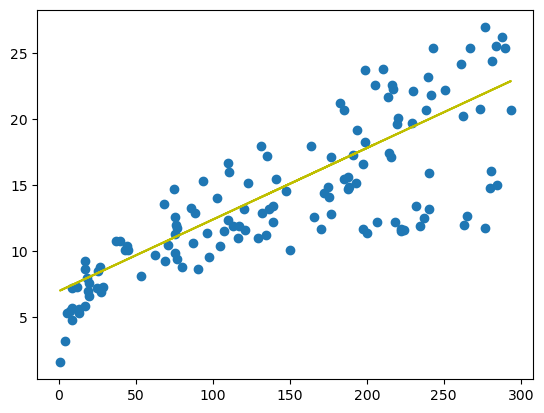

In [65]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.9955+0.0541*x_train,"y")
plt.show()

In [66]:
y_train_pred=model.predict(x_train_constant)
res=(y_train-y_train_pred)
res

64     4.747915
133    1.890977
8     -2.296789
1      1.499333
103   -1.406133
         ...   
134    2.281212
111    2.990561
96    -4.893532
165   -6.547658
185    5.634638
Name: sales, Length: 134, dtype: float64

In [67]:
y_train_pred

array([13.25208546, 17.70902281,  7.09678867,  8.90066748, 16.10613328,
       10.41813657, 17.64370129, 12.06122396, 15.55843748, 20.56809536,
       10.44828496,  7.0867392 , 20.949975  , 17.39246469, 21.11579116,
       10.13172684, 16.59353229, 12.18181753, 13.5083468 , 18.59337566,
       17.55828085, 13.65908876, 19.27171449,  8.64943088, 15.46296757,
       14.06609206,  7.56408875, 16.37244408,  7.32792634, 10.21212255,
       11.49845397, 14.19171036, 15.2167557 , 19.99025117, 12.70438966,
       11.54870129, 19.86463287,  9.35289337, 16.39756774, 16.66890327,
       10.10157845,  7.25255536,  8.91071695, 17.05580764, 18.19642182,
        6.93599724,  7.63945973,  8.10173508, 17.4879346 , 16.26692471,
       11.38288513, 11.82506155, 12.5536477 , 16.65885381, 17.83966585,
       17.92006156, 19.79428662,  7.03146715, 18.22657022, 17.45276148,
       20.74396098, 10.49853228, 12.22704012,  8.83032123, 10.9708571 ,
       13.66411349, 10.69449683, 18.72904342, 17.53818192, 15.49

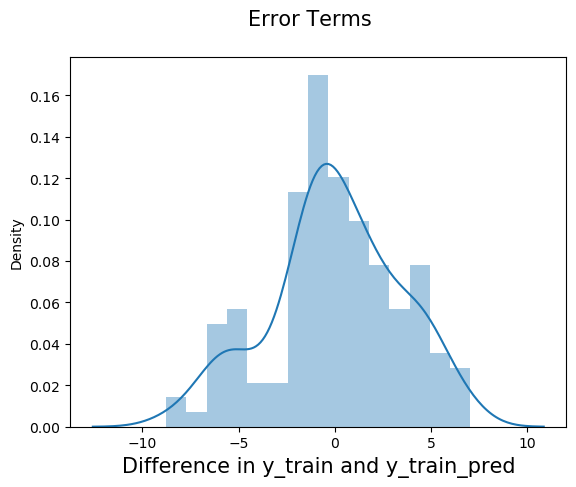

In [68]:
fig=plt.figure()
sns.distplot(res, bins=15)
fig.suptitle("Error Terms", fontsize=15)
plt.xlabel("Difference in y_train and y_train_pred", fontsize=15)
plt.show()

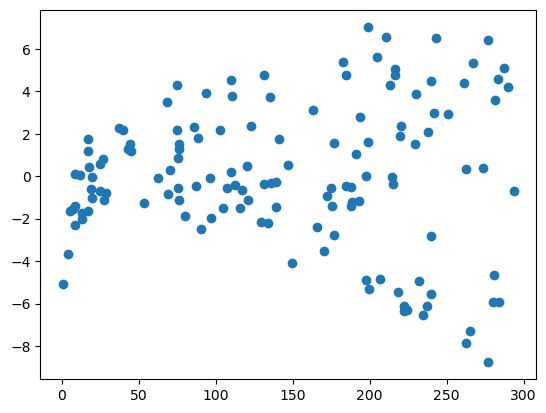

In [69]:
plt.scatter(x_train_reshaped,res)
plt.show()

In [70]:
x_test_constant=sm.add_constant(x_test_reshaped)
y_pred=model.predict(x_test_constant)

In [71]:
y_pred

array([ 7.60428661,  8.24745231, 14.93034597, 10.59400219, 12.71946386,
       13.71436081,  9.17702775, 13.59376724, 15.12631052, 15.7493773 ,
       18.12105084, 17.63867656,  7.95099312, 14.87004919, 17.73414647,
       10.14177631, 11.70949271,  8.5740599 , 16.92013988, 14.2771308 ,
       21.55796758, 17.38743996, 21.03539545, 11.47333031, 21.38210196,
       12.98074993,  9.98600961, 19.41743172, 15.27202775, 16.7040764 ,
       18.08085298,  9.55388265, 10.35281505, 17.25177219, 11.39795932,
        7.86054794,  7.05659081, 16.83974416, 11.17184638, 14.18668563,
       21.27155785, 14.53339214, 11.56377548, 18.13612504,  8.8252965 ,
        9.0916073 , 20.0103501 , 10.07143006,  8.58410936, 13.67416295,
       19.14609618, 13.84500385, 17.06083237, 10.02620747, 19.49782743,
       19.16619511,  9.48856114, 18.68884557, 18.71396923, 18.01050674,
        9.65940203, 15.04591481, 17.19650014, 17.60350344, 18.59337566,
       16.48298818])